In [ ]:
# Install necessary libraries
!pip install gradio plotly -q

## Data Cleaning

## Data Type Conversion

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import gradio as gr
import plotly.express as px

In [ ]:
# 2. Upload dataset
print("⬆️ Please upload your dataset CSV file")
uploaded = files.upload()
# Load the dataset into a pandas DataFrame
df = pd.read_csv('2020-2025.csv')

⬆️ Please upload your dataset CSV file


Saving 2020-2025.csv to 2020-2025.csv


In [ ]:
# Display the shape of the DataFrame (number of rows and columns)
df.shape

(196, 7)

In [ ]:
# Display the data types of each column
df.dtypes

,0
Country,object
2020,int64
2021,float64
2022,float64
2023,float64
2024,float64
2025,float64


In [ ]:
# Check for missing values in each column
df.isnull().sum()

,0
Country,0
2020,0
2021,2
2022,2
2023,2
2024,4
2025,7


In [ ]:
# Calculate the percentage of missing values in each column
df.isnull().mean() * 100

,0
Country,0.000000
2020,0.000000
2021,1.020408
2022,1.020408
2023,1.020408
2024,2.040816
2025,3.571429


In [ ]:
# Display descriptive statistics of the numerical columns
df.describe()

,2020,2021,2022,2023,2024,2025
count,1.960000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.920000e+02,1.890000e+02
mean,4.378886e+05,5.043504e+05,5.255064e+05,5.486173e+05,5.756871e+05,5.991414e+05
std,1.942936e+06,2.220864e+06,2.347886e+06,2.453040e+06,2.573189e+06,2.693421e+06
min,5.200000e+01,6.200000e+01,6.100000e+01,6.300000e+01,6.500000e+01,6.500000e+01
25%,9.588000e+03,1.114175e+04,1.265000e+04,1.360450e+04,1.350050e+04,1.421400e+04
50%,3.533450e+04,3.771900e+04,4.156800e+04,4.363100e+04,4.713550e+04,4.782900e+04
75%,2.074810e+05,2.546132e+05,2.746308e+05,2.850355e+05,2.915108e+05,3.032930e+05
max,2.135412e+07,2.368118e+07,2.600690e+07,2.772072e+07,2.918490e+07,3.050722e+07


In [ ]:
# Calculate the median and mode for numerical columns
medians = df.median(numeric_only=True)
modes = df.mode().iloc[0]

In [ ]:
# Print the calculated medians
print(medians)

2020    35334.5
2021    37719.0
2022    41568.0
2023    43631.0
2024    47135.5
2025    47829.0
dtype: float64


In [ ]:
# Print the calculated modes
print(modes)

Country    Afghanistan
2020                52
2021              62.0
2022              61.0
2023              63.0
2024              65.0
2025           38172.0
Name: 0, dtype: object


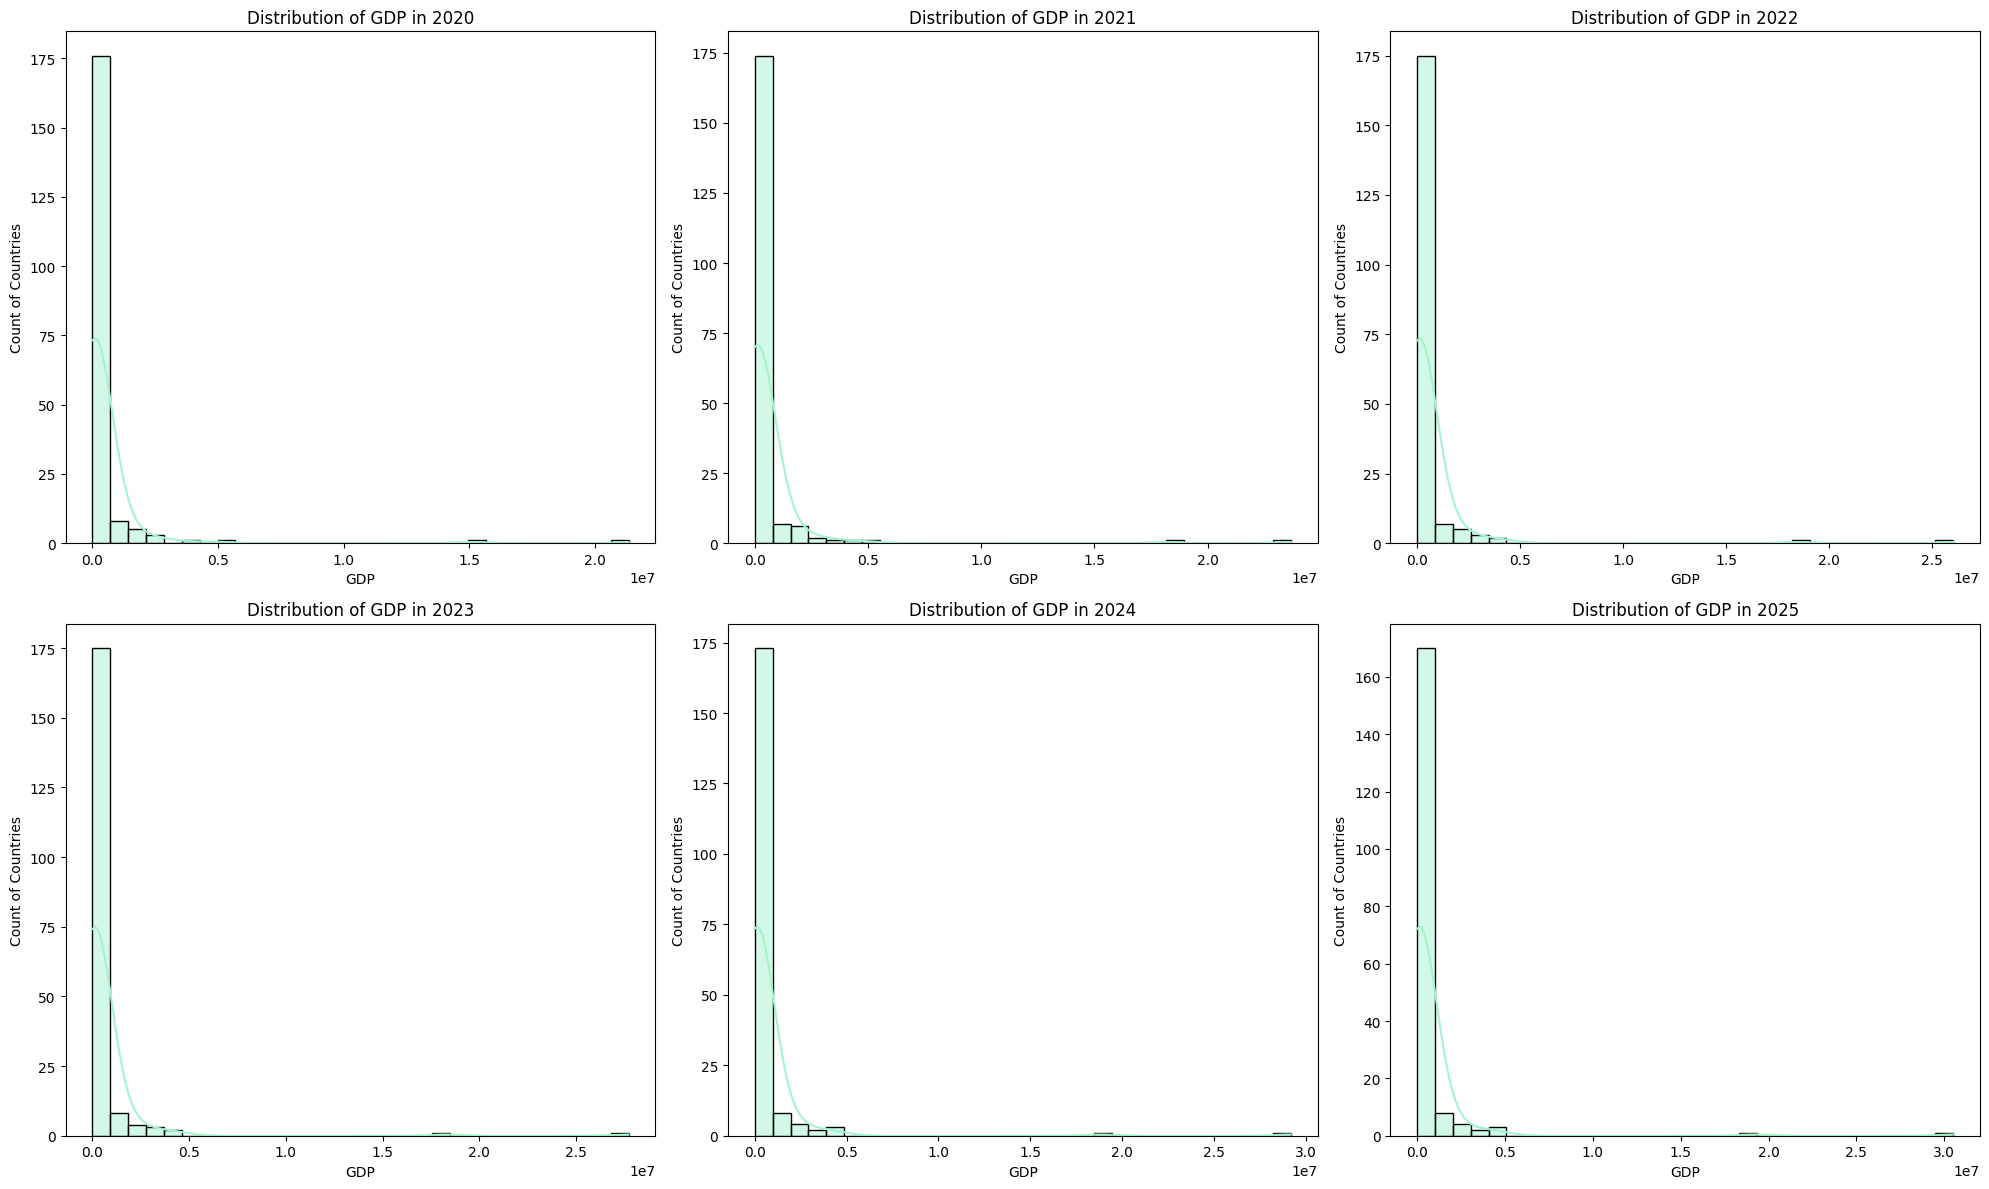

In [ ]:
# Define the years for analysis
years = ['2020','2021','2022','2023','2024','2025']

# Create subplots for the histograms
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# Plot histograms for the GDP distribution in each year
for i, year in enumerate(years):
    sns.histplot(df[year].dropna(), bins=30, kde=True, ax=axes[i], color='#A4F4CF')
    axes[i].set_title(f'Distribution of GDP in {year}')
    axes[i].set_xlabel('GDP')
    axes[i].set_ylabel('Count of Countries')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

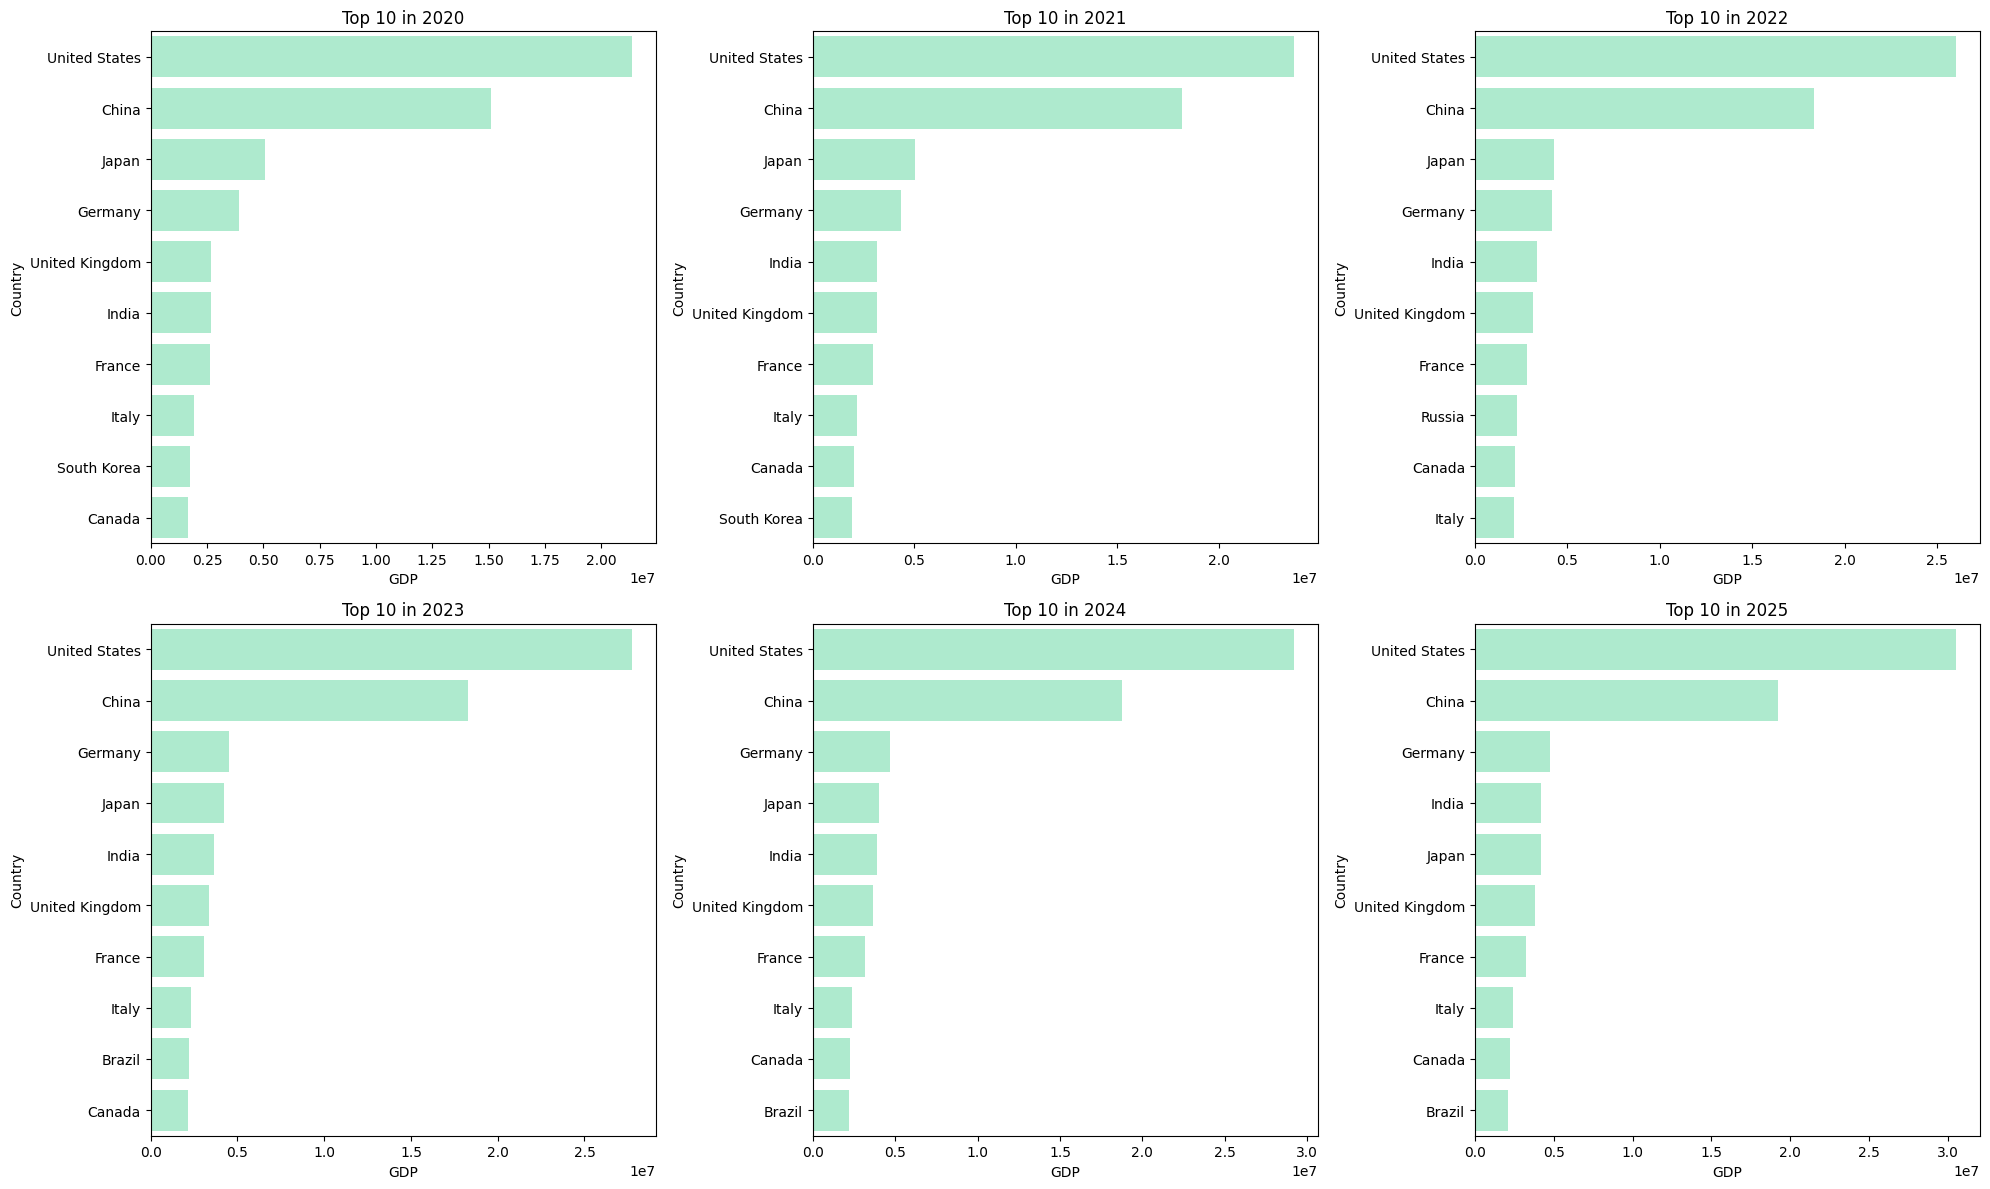

In [ ]:
# Define the years for analysis
years = ['2020','2021','2022','2023','2024','2025']

# Create subplots for the bar plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# Plot the top 10 countries by GDP for each year
for i, year in enumerate(years):
    top10 = df[['Country', year]].dropna().sort_values(by=year, ascending=False).head(10)

    sns.barplot(data=top10, x=year, y='Country', ax=axes[i], color='#A4F4CF')
    axes[i].set_title(f'Top 10 in {year}')
    axes[i].set_xlabel('GDP')
    axes[i].set_ylabel('Country')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

##Data Cleaning

In [ ]:
# Display the first few rows of the DataFrame
df

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0
...,...,...,...,...,...,...,...
191,Vietnam,346310,370076.0,411068.0,433008.0,459472.0,490970.0
192,Palestine,15532,18109.0,19166.0,17848.0,NaN,NaN
193,Yemen,20220,19394.0,23534.0,19412.0,19101.0,17401.0
194,Zambia,18138,22096.0,29164.0,27578.0,26326.0,28910.0


In [ ]:
# Display information about the DataFrame, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    object 
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ KB


In [ ]:
# Display descriptive statistics of the numerical columns
df.describe()

,2020,2021,2022,2023,2024,2025
count,1.960000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.920000e+02,1.890000e+02
mean,4.378886e+05,5.043504e+05,5.255064e+05,5.486173e+05,5.756871e+05,5.991414e+05
std,1.942936e+06,2.220864e+06,2.347886e+06,2.453040e+06,2.573189e+06,2.693421e+06
min,5.200000e+01,6.200000e+01,6.100000e+01,6.300000e+01,6.500000e+01,6.500000e+01
25%,9.588000e+03,1.114175e+04,1.265000e+04,1.360450e+04,1.350050e+04,1.421400e+04
50%,3.533450e+04,3.771900e+04,4.156800e+04,4.363100e+04,4.713550e+04,4.782900e+04
75%,2.074810e+05,2.546132e+05,2.746308e+05,2.850355e+05,2.915108e+05,3.032930e+05
max,2.135412e+07,2.368118e+07,2.600690e+07,2.772072e+07,2.918490e+07,3.050722e+07


In [ ]:
# Check for missing values in each column
print(df.isnull().sum())

Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64


In [ ]:
# Handle missing data by dropping rows with any null values
df = df.dropna()

In [ ]:
# Verify that there are no missing values after dropping
print(df.isnull().sum())

Country    0
2020       0
2021       0
2022       0
2023       0
2024       0
2025       0
dtype: int64


Convert data types

In [ ]:
# Display the data types of each column
df.dtypes

,0
Country,object
2020,int64
2021,float64
2022,float64
2023,float64
2024,float64
2025,float64


In [ ]:
# Convert The Dtype of 2020 Column from int to float
df['2020'] = df['2020'].astype(float)
print(df.dtypes)

Country     object
2020       float64
2021       float64
2022       float64
2023       float64
2024       float64
2025       float64
dtype: object


/tmp/ipython-input-77474991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2020'] = df['2020'].astype(float)


In [ ]:
# Renaming the columns for clarity
df.rename(columns={'2020':'GDP_2020', '2021':'GDP_2021',
                   '2022':'GDP_2022','2023':'GDP_2023',
                   '2024':'GDP_2024','2025':'GDP_2025'}, inplace=True)

/tmp/ipython-input-1574881796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'2020':'GDP_2020', '2021':'GDP_2021',


In [ ]:
# Display the first 10 rows of the DataFrame after renaming columns
df.head(10)

,Country,GDP_2020,GDP_2021,GDP_2022,GDP_2023,GDP_2024,GDP_2025
1,Albania,15271.0,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774.0,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885.0,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521.0,84375.0,142442.0,109764.0,115946.0,113343.0
5,Antigua and Barbuda,1412.0,1602.0,1867.0,2006.0,2225.0,2373.0
6,Argentina,385218.0,486040.0,632318.0,645511.0,632145.0,683533.0
7,Armenia,12642.0,13879.0,19514.0,24086.0,25533.0,26258.0
8,Aruba,2486.0,2929.0,3279.0,3649.0,3952.0,4100.0
9,Australia,1362613.0,1655843.0,1725461.0,1742461.0,1796805.0,1771681.0
10,Austria,434050.0,480786.0,472339.0,512509.0,521269.0,534301.0


In [ ]:
# Saving the cleaned dataset to a CSV file
df.to_csv("data_clean.csv")

In [ ]:
# Check for missing values after saving the cleaned data
df.isnull().sum()

,0
Country,0
GDP_2020,0
GDP_2021,0
GDP_2022,0
GDP_2023,0
GDP_2024,0
GDP_2025,0


In [ ]:
# Display the entire cleaned DataFrame
df

,Country,GDP_2020,GDP_2021,GDP_2022,GDP_2023,GDP_2024,GDP_2025
1,Albania,15271.0,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774.0,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885.0,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521.0,84375.0,142442.0,109764.0,115946.0,113343.0
5,Antigua and Barbuda,1412.0,1602.0,1867.0,2006.0,2225.0,2373.0
...,...,...,...,...,...,...,...
190,Venezuela,42838.0,56615.0,89013.0,102377.0,119808.0,108511.0
191,Vietnam,346310.0,370076.0,411068.0,433008.0,459472.0,490970.0
193,Yemen,20220.0,19394.0,23534.0,19412.0,19101.0,17401.0
194,Zambia,18138.0,22096.0,29164.0,27578.0,26326.0,28910.0


In [ ]:
# Install necessary libraries (already installed, but good to include for completeness)
!pip install gradio plotly -q

# Import necessary libraries
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# دالة لحساب أعلى الدول نموًا بين أول وآخر سنة
def top_growth(n=5):
    # Calculate the GDP growth from 2020 to 2025
    df['growth'] = df['GDP_2025'] - df['GDP_2020']
    # Sort by growth and select the top n countries
    top_countries = df.sort_values('growth', ascending=False).head(n)
    # Return the country, GDP in 2020, GDP in 2025, and the calculated growth
    return top_countries[['Country', 'GDP_2020','GDP_2025','growth']]

# دالة لإظهار أغنى الدول في سنة معينة
def richest_countries(year='GDP_2025', n=5):
    # Sort by the selected year's GDP and select the top n countries
    top_countries = df.sort_values(year, ascending=False).head(n)
    # Return the country and the GDP for the selected year
    return top_countries[['Country', year]]

# رسم خط تطور GDP لدولة
def plot_country_trend(country='Algeria'):
    # Select the GDP columns (years)
    years = [col for col in df.columns if col.startswith('GDP_')]
    # Get the GDP values for the selected country
    values = df[df['Country']==country][years].values.flatten()
    # Create a plot
    plt.figure(figsize=(8,4))
    # Plot the GDP trend over the years
    plt.plot(years, values, marker='o')
    # Set plot title and labels
    plt.title(f'GDP Trend: {country}')
    plt.xlabel('Year')
    plt.ylabel('GDP')
    # Add grid and adjust layout
    plt.grid(True)
    plt.tight_layout()
    # Show the plot
    plt.show()
    return plt

# رسم Boxplot لتوزيع GDP
def plot_gdp_distribution():
    # Select the GDP columns (years)
    years = [col for col in df.columns if col.startswith('GDP_')]
    # Create a plot
    plt.figure(figsize=(10,5))
    # Create a boxplot of GDP distribution per year
    df[years].boxplot()
    # Set plot title and labels
    plt.title('GDP Distribution per Year')
    plt.ylabel('GDP')
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    # Adjust layout
    plt.tight_layout()
    # Show the plot
    plt.show()
    return plt

# خريطة تفاعلية GDP حسب الدولة
def gdp_map(year='GDP_2025'):
    # Create a choropleth map using Plotly
    fig = px.choropleth(df, locations='Country', locationmode='country names',
                        color=year, hover_name='Country',
                        color_continuous_scale='Viridis',
                        title=f'World GDP {year}')
    # Show the map
    fig.show()
    return fig

# Multi-line plot لأكثر من دولة
def plot_multi_line(countries):
    # Select the GDP columns (years)
    years = [col for col in df.columns if col.startswith('GDP_')]
    # Create a plot
    plt.figure(figsize=(10,5))
    # Plot GDP trends for selected countries
    for country in countries:
        values = df[df['Country']==country][years].values.flatten()
        plt.plot(years, values, marker='o', label=country)
    # Set plot title and labels
    plt.title('GDP Trends for Selected Countries')
    plt.xlabel('Year')
    plt.ylabel('GDP')
    # Add legend, grid, and adjust layout
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # Show the plot
    plt.show()
    return plt

# Bubble chart
def bubble_chart(year='GDP_2025'):
    # Create a scatter plot (bubble chart) using Plotly
    fig = px.scatter(df, x="Country", y=year, size=year, color=year,
                     hover_name="Country", size_max=60,
                     title=f'Bubble Chart of GDP in {year}')
    # Hide x-axis labels and adjust layout
    fig.update_layout(xaxis={'visible': False}, margin=dict(l=20, r=20, t=40, b=20))
    # Show the plot
    fig.show()
    return fig

# واجهة Gradio
years = [col for col in df.columns if col.startswith('GDP_')]

# Create a Gradio interface with multiple tabs
with gr.Blocks() as demo:
    gr.Markdown("## استعراض GDP للدول")

    # Tab for displaying top growth countries
    with gr.Tab("أعلى نمو"):
        n_growth = gr.Slider(minimum=1, maximum=20, step=1, label="عدد الدول")
        btn_growth = gr.Button("عرض")
        output_growth = gr.Dataframe()
        btn_growth.click(fn=top_growth, inputs=n_growth, outputs=output_growth)

    # Tab for displaying richest countries in a given year
    with gr.Tab("أغنى دول"):
        year_input = gr.Dropdown(choices=years, value='GDP_2025', label="اختر السنة")
        n_rich = gr.Slider(minimum=1, maximum=20, step=1, label="عدد الدول")
        btn_rich = gr.Button("عرض")
        output_rich = gr.Dataframe()
        btn_rich.click(fn=richest_countries, inputs=[year_input, n_rich], outputs=output_rich)

    # Tab for plotting GDP trend for a single country
    with gr.Tab("لدولة GDP تطور"):
        country_input = gr.Dropdown(choices=df['Country'].tolist(), value='Algeria', label="اختر الدولة")
        btn_trend = gr.Button("عرض")
        output_trend = gr.Plot()
        btn_trend.click(fn=plot_country_trend, inputs=country_input, outputs=output_trend)

    # Tab for plotting GDP distribution using a boxplot
    with gr.Tab("توزيع GDP"):
        btn_box = gr.Button("عرض Boxplot")
        output_box = gr.Plot()
        btn_box.click(fn=plot_gdp_distribution, inputs=None, outputs=output_box)

    # Tab for displaying a world GDP map
    with gr.Tab("خريطة GDP"):
        year_map = gr.Dropdown(choices=years, value='GDP_2025', label="اختر السنة")
        btn_map = gr.Button("عرض الخريطة")
        output_map = gr.Plot()
        btn_map.click(fn=gdp_map, inputs=year_map, outputs=output_map)

    # Tab for comparing GDP trends of multiple countries
    with gr.Tab("مقارنة دول (Multi-line)"):
        country_multi = gr.CheckboxGroup(choices=df['Country'].tolist(), label="اختر الدول (2 أو أكثر)")
        btn_multi = gr.Button("عرض")
        output_multi = gr.Plot()
        btn_multi.click(fn=plot_multi_line, inputs=country_multi, outputs=output_multi)

    # Tab for displaying a bubble chart of GDP
    with gr.Tab("Bubble Chart"):
        year_bubble = gr.Dropdown(choices=years, value='GDP_2025', label="اختر السنة")
        btn_bubble = gr.Button("عرض")
        output_bubble = gr.Plot()
        btn_bubble.click(fn=bubble_chart, inputs=year_bubble, outputs=output_bubble)

# Launch the Gradio interface
demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://21be64ead0ebe6a12b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
